
<h1> <strong>Neural Network</strong> </h1> 

    In this notebook I have tried to explain how neural networks work and also tried to use neural network to make an MNIST classifier which basically recognizes handwritten digits(incomplete).


<h2> <strong>Basics of working of neural network</strong></h2>

    1.First you create layers. There is input layer, output layer and a number of hidden layers(the number of hidden layers depends on how complex the problem is). The layers contain nodes and each node in the layers(excpet the input layer) are assigned their weights and biases(parameters).

    2.After making a basic structure and assigning random weights and biases to the network we feed the input to the network and get and output(It doesn't matter what the output is, we are going to go through various steps to get the desired output later).

    3.Now to calculate the desired output we need, we make a loss function which judges how far the value of our output is, from the desired value.

    4.Now we can start changing the parameters and see the effect of the changes on our output and try to minimize the loss function by fine-tuning the parameters such that the loss function is minimized.

    5.We iterate through the previous step multiple times and try to get as accurate as we can.


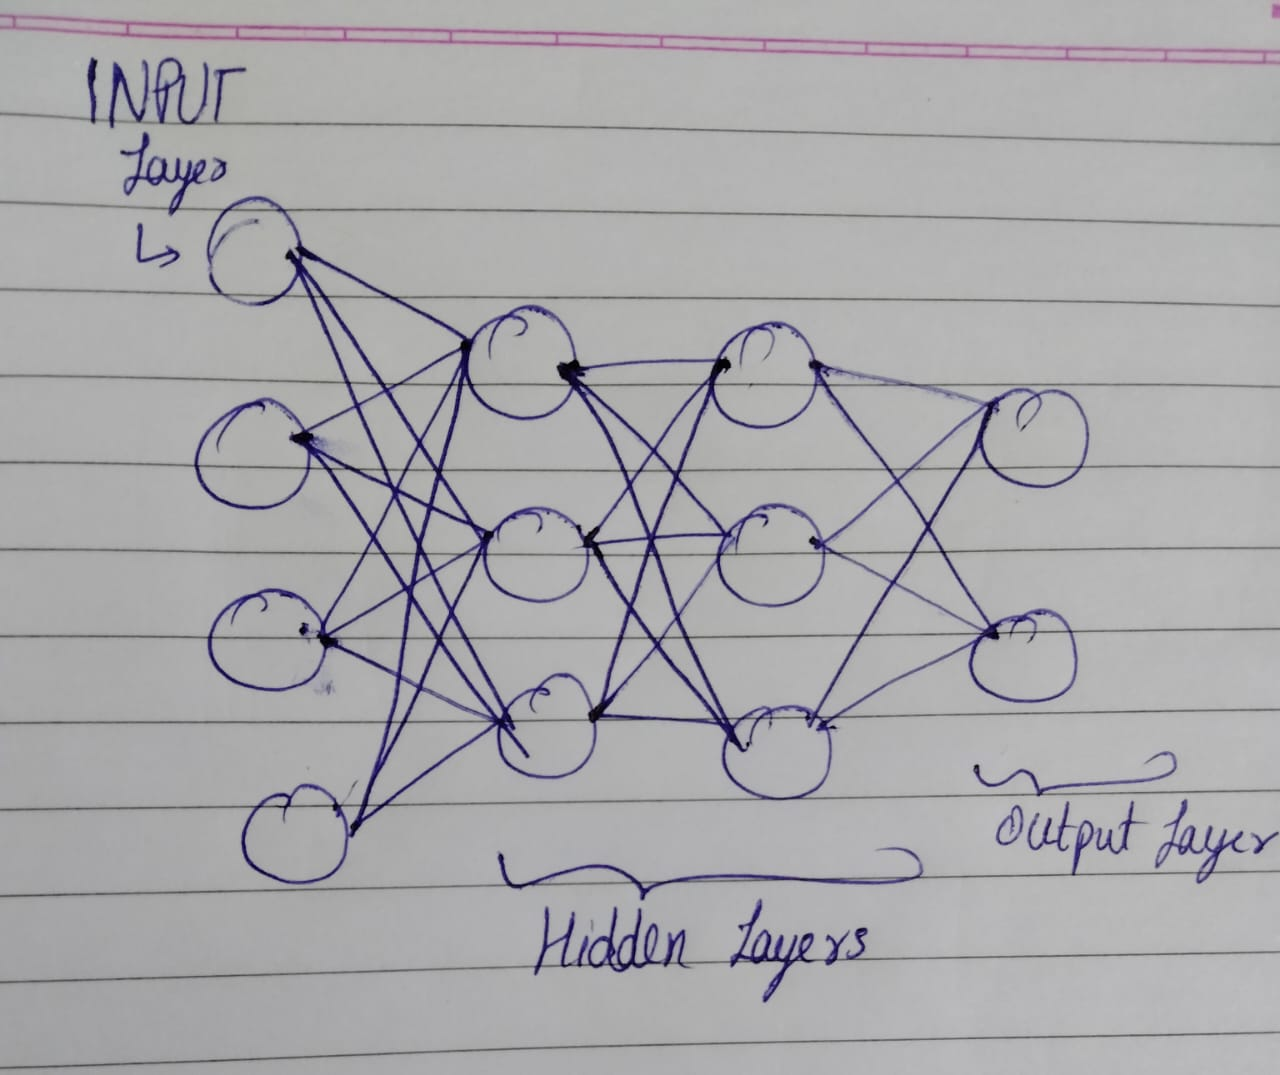

    This is the basic structure of a neural network.

    The circles in each layer are called nodes.

    The lines joining the nodes can be thought of as wights of the a particular node with respect the node with which it is attached.

<STRONG>BUT WHAT ARE WEIGTHS AND BIASES?</STRONG>

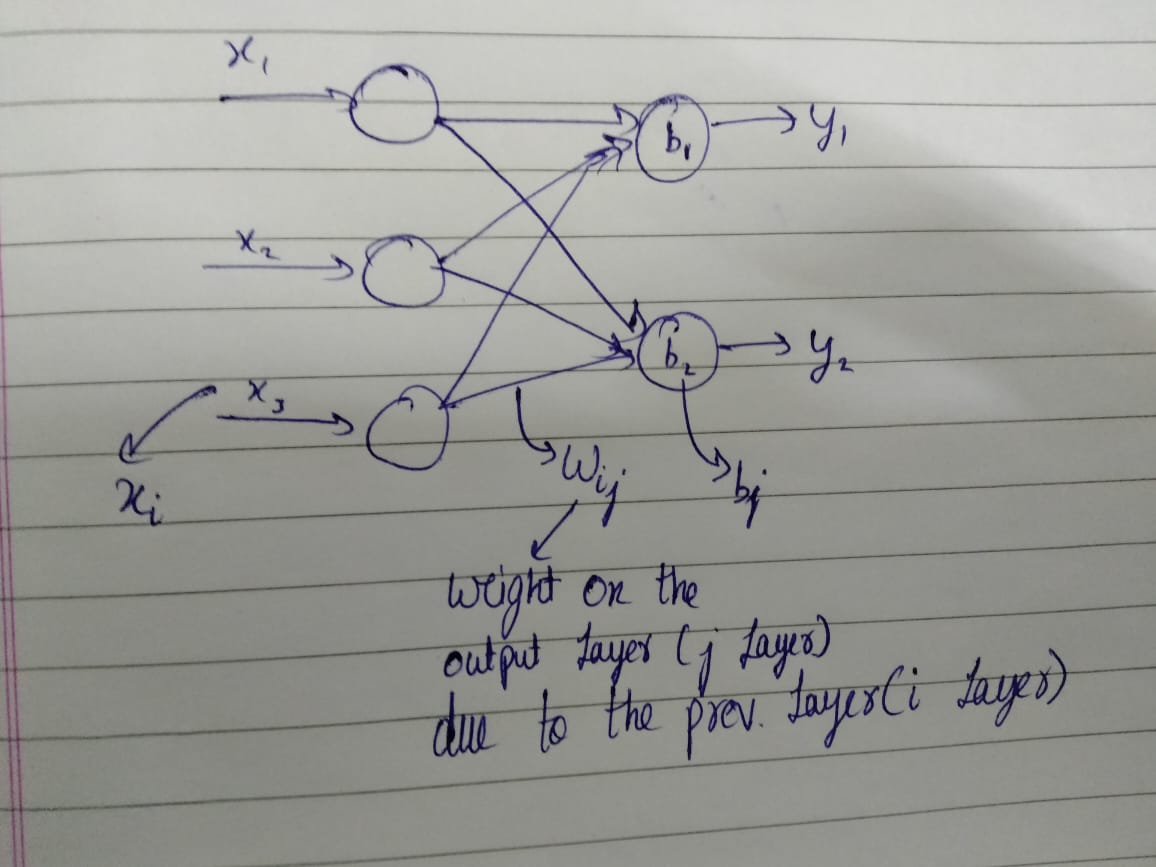

    So lets say the first layer is getting input x1,x2...xi and the output are coming out as y1,y2...yj.

    We can see the weights and biases and can think of them as little knobs which we have to turn(basically change/fine-tune their values) to get the desired result.

    More on weights and biases after explaination of forward and backward propagation.


<h3>
    <strong>
        Forward Propagation
    </strong>
</h3>

    In the image above we can see the inputs(xi) and outputs(yj).

    They can be written like:

><h3>
<strong>
y(j)=sum(w(ij) * x(i)) + b(j)
</strong>
</h3>
    And if there are any more layers after this then y(j) will act as input values for them with their own weights and biases.

<h3><strong> Activation Function</strong></h3>

    Before passing the output to the next layer we pass the value y to a function which changes the linear value to non-linear.

    If we keep our values linear then out model won't be able to learn anything and it would just be a fancy linear regression model(kind of).

    Some of the important activation functions are:

<h4><strong>1.ReLU (Rectified Linear Unit) Activation Function</strong></h4>

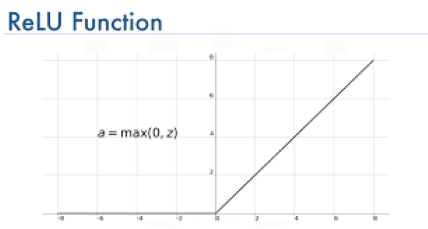

<h4><strong>2.Sigmoid or Logistic Activation Function</strong></h4>

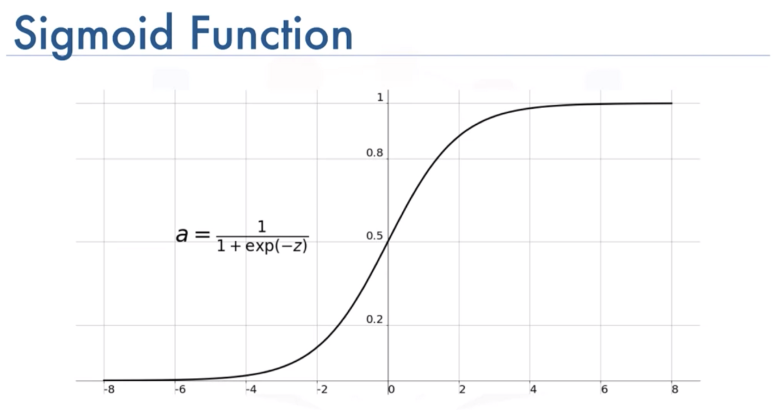

<h4><strong>3.Softmax </strong></h4>

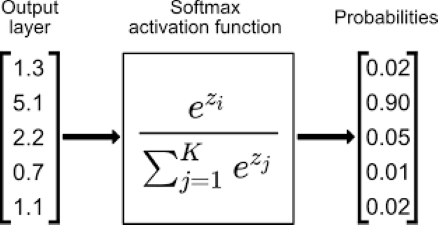

<h4><strong>4.Leaky ReLU</strong></h4>

    Leaky ReLU is preferred over ReLU in order to solve the "Dead ReLU" problem.
    The ReLU activation function gives the derivate as 1 when the value is positive. In case when the value is negative, the derivative becomes 0 during the backpropagation(next section).
    This means that when the value is negative, no learning happens as the new weight remains equal to the old weight since the value of the derivative is 0. This is called the “Dead ReLU” issue.

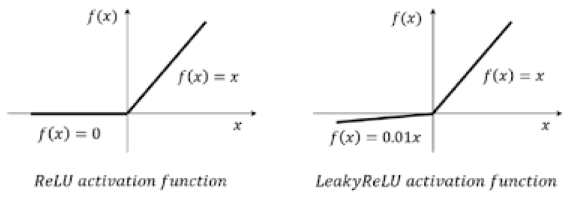

    So in case of Leaky ReLU even if small but the derivative for negative values exist.

Here is simplified representation of a forward prop for a single neuron.

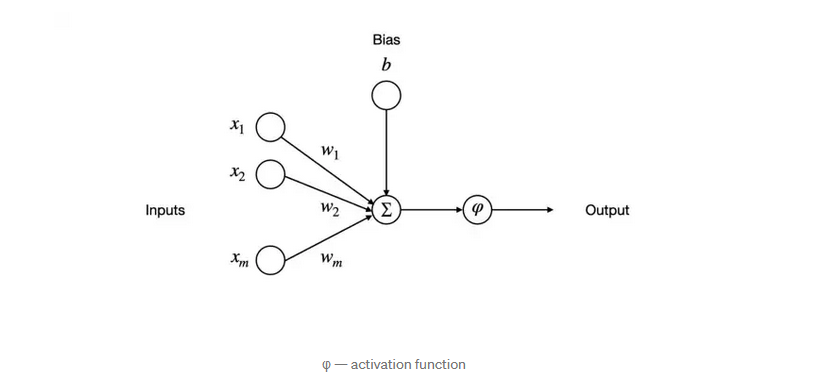

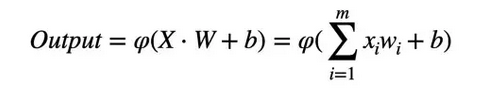

<h3>
    <strong>
        Backward Propagation
    </strong>
</h3>

    The basics of this step is that we have to find the rate of change of our loss function with respect to the parameters. In the following example I have considered a simple network to show the working of backpropagation.


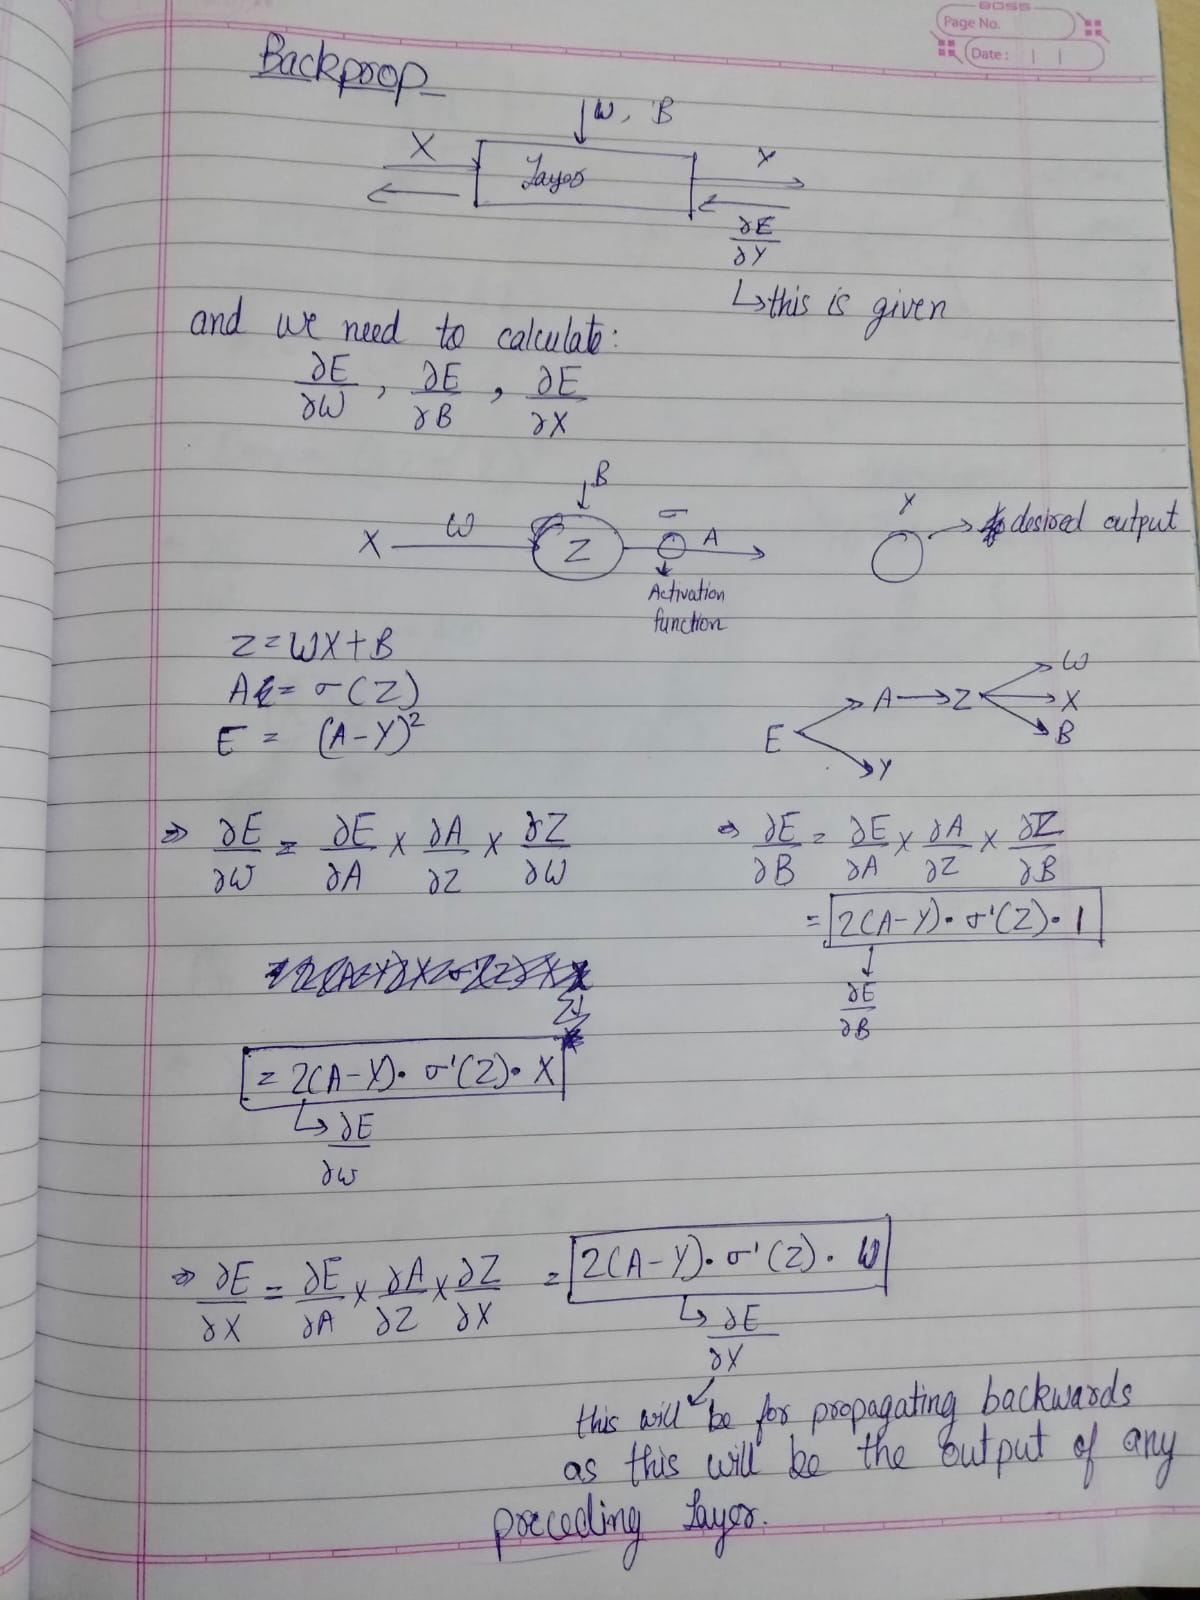


<h3><strong>Importing the MNIST data</strong></h3>

First we will import the MNIST handwritten digit data.

In [54]:
import numpy as np
import pandas as pd

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [55]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)
print(m,n)
print("------------")

data_train = data[0:m].T
print(data_train)
print("------------")

Y_train = data_train[0]
print(Y_train)
print("------------")
X_train = data_train[1:n]
X_train = X_train / 255
print(X_train)
print("------------")
m_train = X_train.shape


42000 785
------------
[[3 9 5 ... 2 5 7]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
------------
[3 9 5 ... 2 5 7]
------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
------------


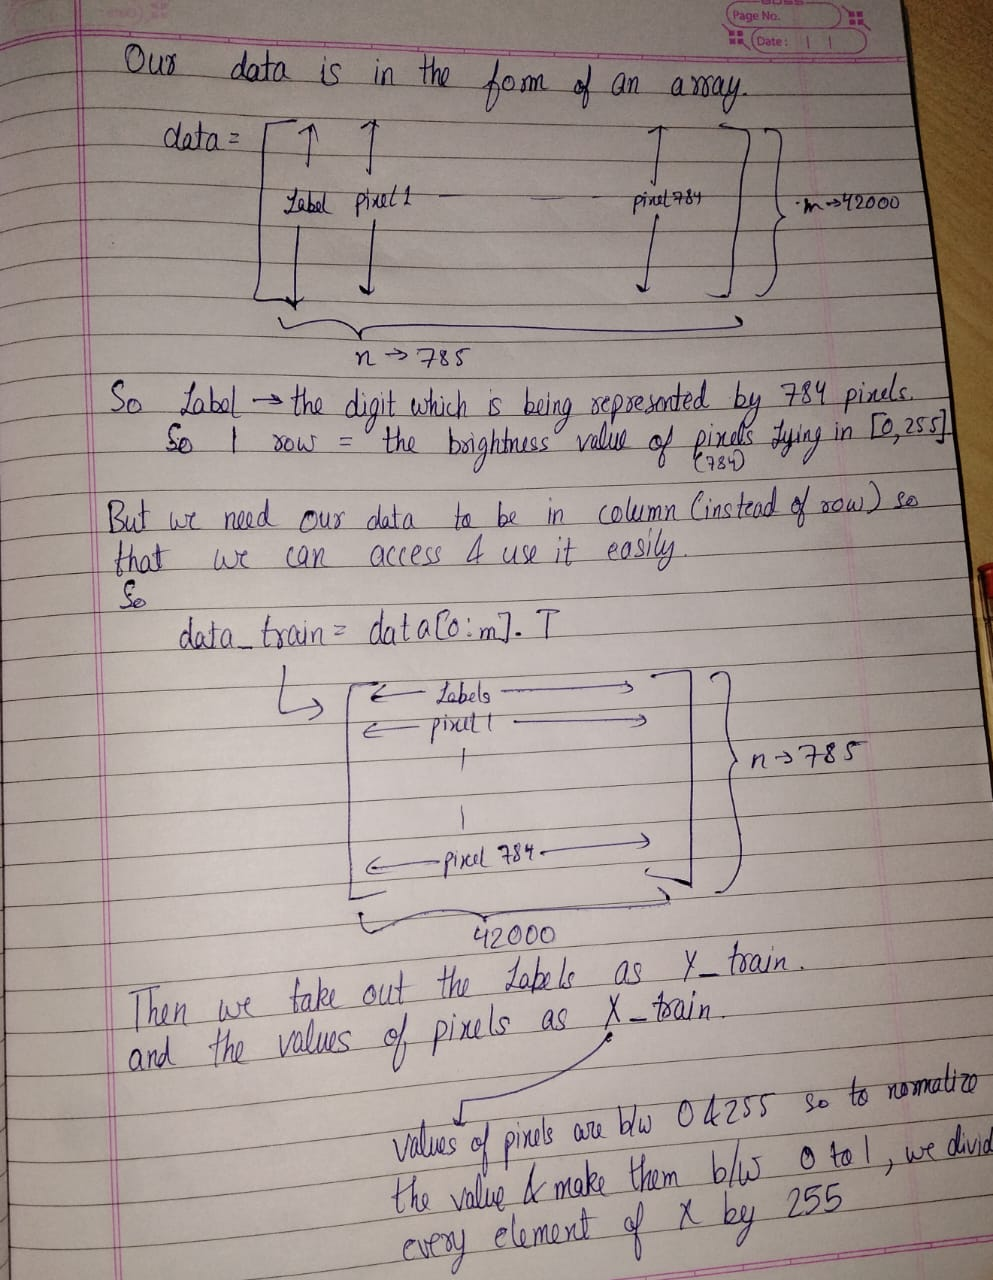

<h3>
    <strong>
        Initialising weights and biases(parameters)
    </strong>
</h3>

    We take the values of weights and parameters using randn function which gives values between -0.5 and 0.5.
    
    This is how the basic structure of our network looks like.
    
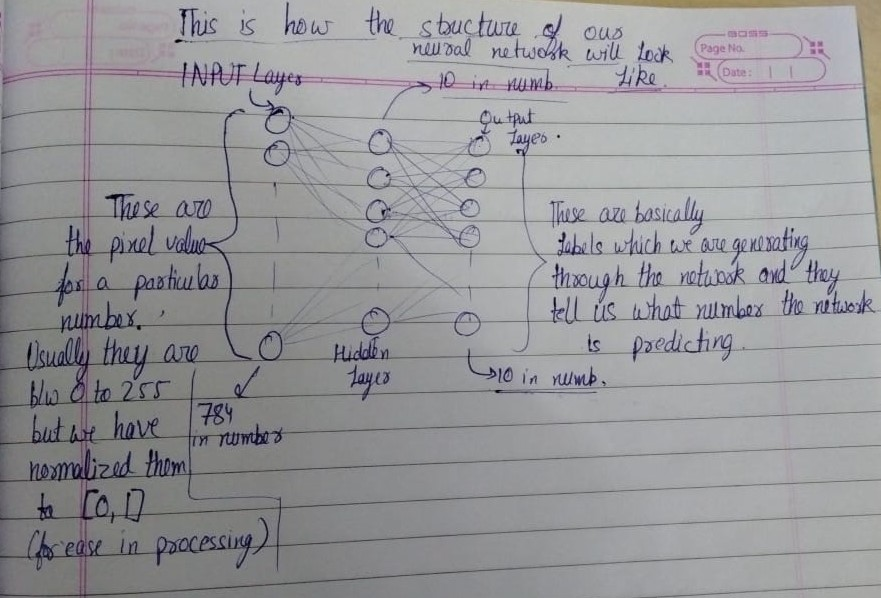

In [56]:
def init_params():
    W1 = np.random.randn(10, 784) #This is for the first set of weigths which go from input layer(784 pixel values) to the first hidden layer(10nodes)
    b1 = np.random.randn(10, 1)   #As there are 10 nodes in the first hidden layer there are 10 biases.
    W2 = np.random.randn(10, 10)  #This is for the second set of weights which go from first hidden layer(10 nodes) to output layer (0-9 labels)
    b2 = np.random.randn(10, 1)   #There are 10 total labels in the output layer so 10 biases
    return W1, b1, W2, b2

<h3>
    <strong>
        Activation Function Code
    </strong>
</h3>
    
    For the first input to hidden layer, I  used ReLU as activation function.
    But for the hidden to output layer, I could not figure out how to apply sigmoid function to a every element in a vector but I found another
    activation function called softmax and I also found how it can be applied to every element in a vector so I used it but I then could not
    find how to apply derivative of the softmax(for backprop) to every element of the vector.

In [64]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    exps = np.exp(Z - Z.max())
    return exps / np.sum(exps)
    
def ReLU_deriv(Z):
    return Z > 0

<h3><strong> Forward Propagation code</strong></h3>


In [58]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1,X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

<h3><strong>One-hot encoding</strong></h3>

Changing the final label output(desired output) from the numbers(0-9) to binary values(0 and 1) so that we can get the error easily.

For example: The digit we want to predict is 5 

So the value of 5 in the final array will be one and rest will be zero and when calculating error and fine tuning the parameters we can come the values(i.e. value of node of 5=1(or close to 1) and rest all node values=0(or close to zero)).

In [59]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

<h3><strong>Backward Propagation Code</strong></h3>

    Here dW1= rate of change of error with respect to the weights of input to hidden layer.
         db1= rate of change of error with respect to the biases of input to hidden layer.
         dW2= rate of change of error with respect to the weights of hidden to output layer.
         db2= rate of change of error with respect to the biases of hidden to output layer.
         
    Again, I am not able to calculate the derivative of softmax and apply it to every element of a vector so dW2 will not be correct.
    We can see from the image in backprop section that:    
        dW=2(A-Y)*f'(Z)*X   (where f=activation function-softmax in this case)
        db=2(A-Y)*f'(Z)*1   (where f=activation function-softmax in this case)
    So I am missing the f'(Z) part which breaks the whole network as dW1,db1 is also dependent on dW2 and db2.
    

In [60]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    # We have to find the change in cose with respect to the change in parameters
    dE = (A2 - one_hot_Y)
    dW2 = 1 / m * dE.dot(A1.T)
    db2 = 1 / m * np.sum(dE)
    dZ1 = W2.T.dot(dE) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * ReLU_deriv(Z1).dot(np.sum(dZ1))
    
    return dW1, db1, dW2, db2

<h3><strong>Updating the parameters</strong></h3>

In [61]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
    

In [62]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 501)

<h3><strong>Conclusion</strong></h3>

    I still need to get a grasp over how to convert the ideas(mainly backprop) of neural network to code and implement it successfully.